In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data frame
df = pd.read_csv(r'D:\Imarticus\Class work\Self Learn projects\Deploy\Churn_Modelling.csv', delimiter=',')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

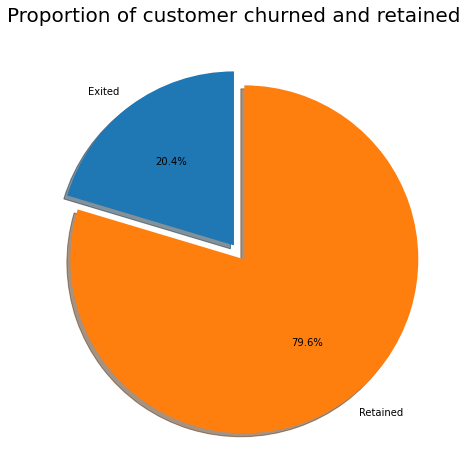

In [5]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

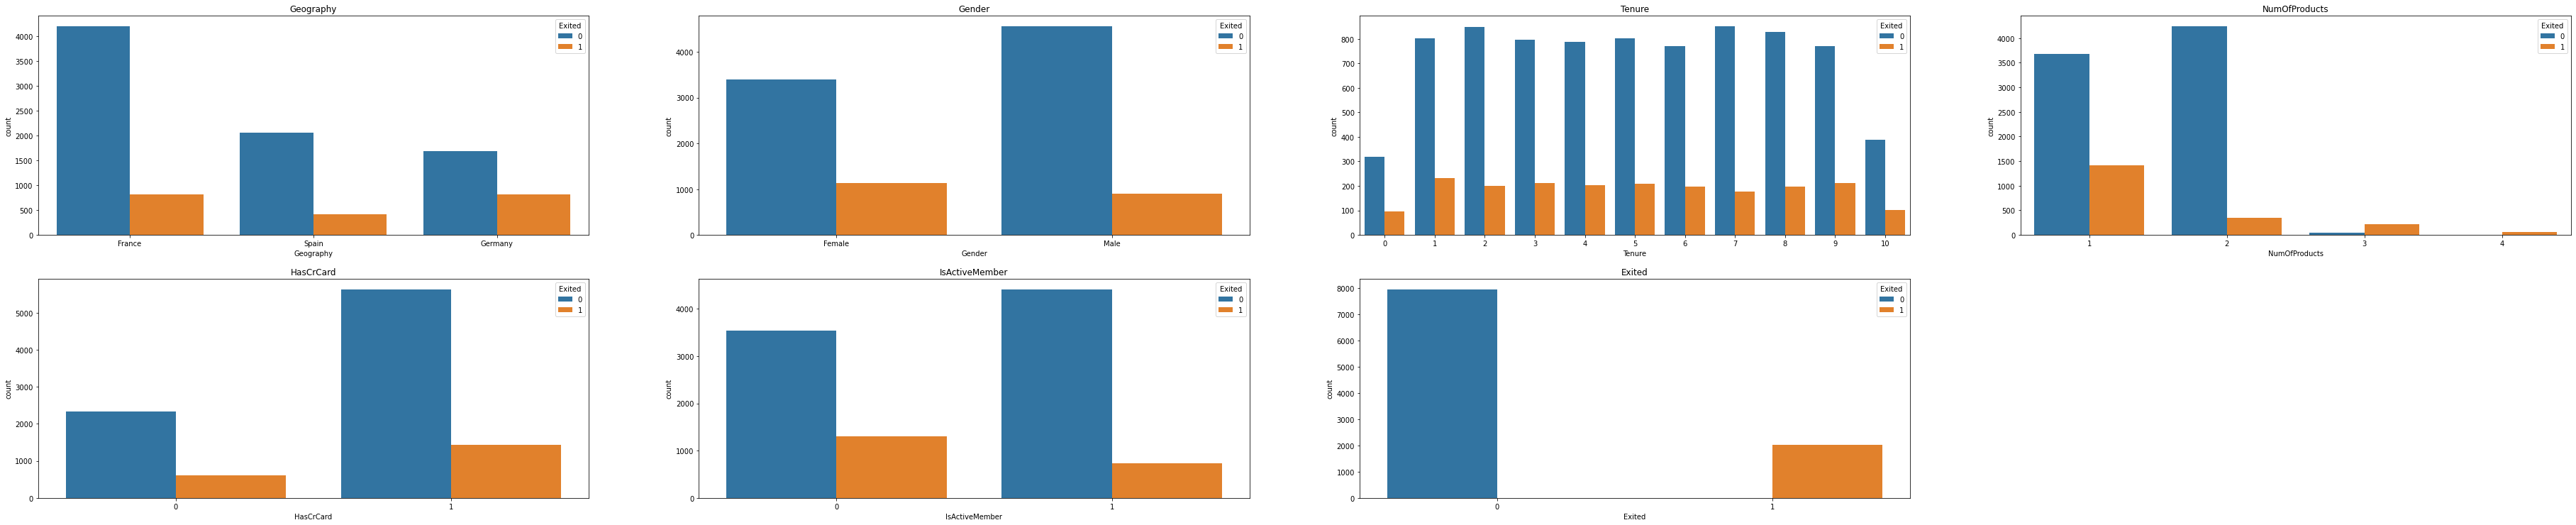

In [6]:
nuniq = df.nunique()
ds = df[[col for col in df if nuniq[col]>1 and nuniq[col]<50]]
nrow, ncol = ds.shape
colname = list(ds)
max_graph = 20
graph_per_row = 4
graph_row = (ncol+graph_per_row-1)/graph_per_row
plt.figure(figsize=(16*graph_per_row,5*graph_row))
for i in range(min(ncol,max_graph)):
    plt.subplot(graph_row,graph_per_row,i+1)
    coldf = ds.iloc[:,i]
    if (not np.issubdtype(type(coldf),np.number)):
        sns.countplot(colname[i],data = ds, hue = 'Exited')
    else:
        coldf.hist()
    plt.title(colname[i])
plt.show()

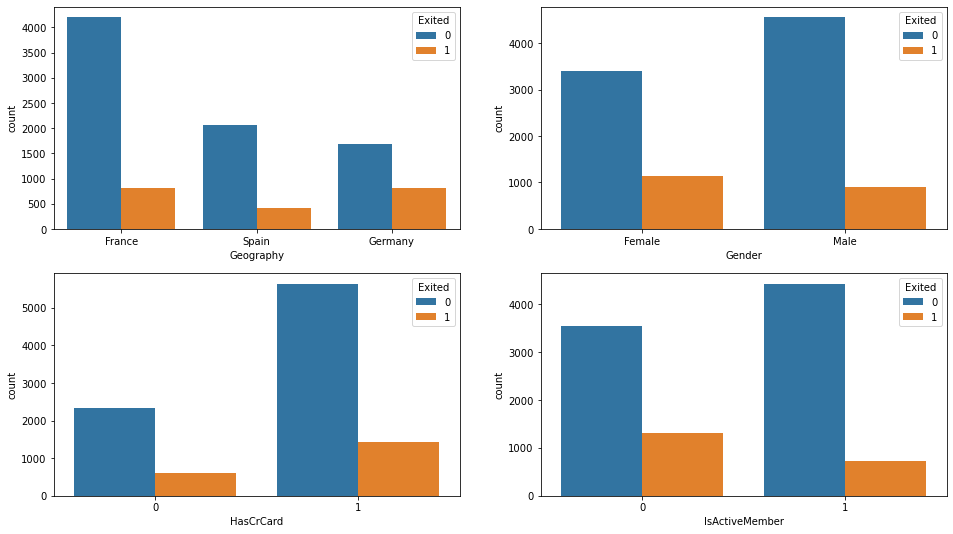

In [7]:
cols = ['Geography', 'Gender','HasCrCard','IsActiveMember']
plt.figure(figsize=(16,9))
for i,j in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.countplot(x=j,hue='Exited', data =df)
plt.show() 


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

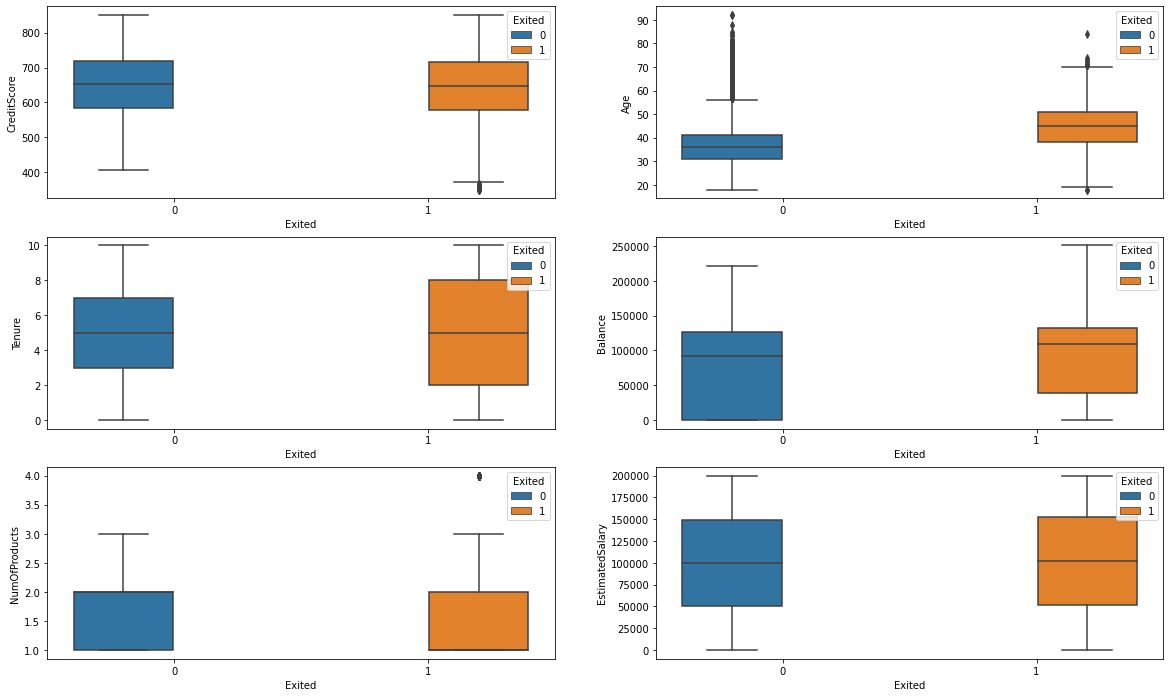

In [8]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

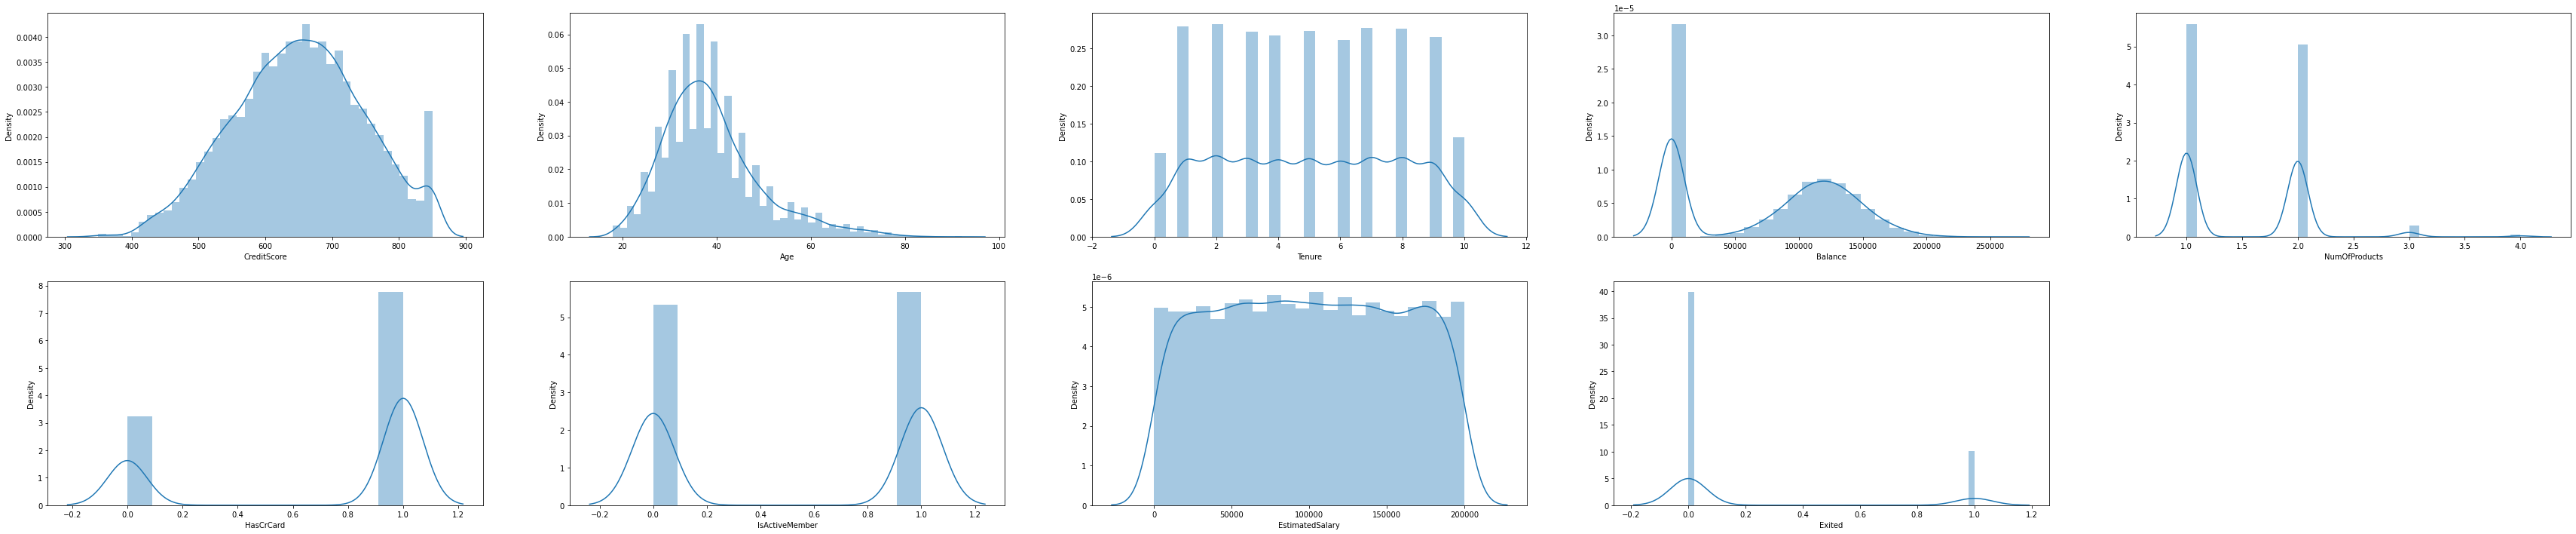

In [9]:
cont_var = df.select_dtypes(exclude='object').columns
nrow = (len(cont_var)+5-1)/5
plt.figure(figsize=(12*5,6*2))
for i,j in enumerate(cont_var):
    plt.subplot(nrow,5,i+1)
    sns.distplot(df[j])
plt.show()

In [10]:
df1= pd.get_dummies(df,drop_first=True)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:
x= df1.drop('Exited',1)
y = df1['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 7)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [17]:
ann = Sequential()

ann.add(Dense(10, kernel_initializer='he_uniform', activation = 'relu', input_dim = 11))

ann.add(Dense(6, kernel_initializer='he_uniform', activation = 'relu'))

ann.add(Dense(4, kernel_initializer='he_uniform', activation = 'relu'))

ann.add(Dense(2, kernel_initializer='he_uniform', activation = 'relu'))

ann.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

ann.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = ann.fit(x_train,y_train,batch_size=100, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 0.9633 - accuracy: 0.2136 - val_loss: 0.7980 - val_accuracy: 0.2548
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.7438 - accuracy: 0.3503 - val_loss: 0.6990 - val_accuracy: 0.5028
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.6517 - val_loss: 0.6542 - val_accuracy: 0.7736
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.7936 - val_loss: 0.6305 - val_accuracy: 0.8008
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6232 - accuracy: 0.7991 - val_loss: 0.6155 - val_accuracy: 0.7988
Epoch 6/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.7981 - val_loss: 0.6032 - val_accuracy: 0.7976
Epoch 7/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5978 - accuracy: 0.7981 - val_loss: 0.5919 - val_accuracy: 0.7972
Epoch 8/100
7

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = ann.predict(x_test)
y_pred = (y_pred> 0.5)

In [22]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

0.8596


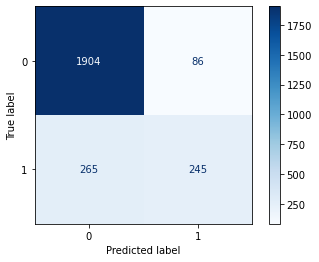

In [23]:
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()